PROJECT TITLE
Water Potality Data Analysis

In [16]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#import dataset
df=pd.read_csv(r"C:\Users\priya\Downloads\water_potability.csv")


In [8]:
#data overview
df.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [9]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [12]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [13]:
df.shape

(3276, 10)

In [10]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [15]:
#data cleaning
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [14]:
df.info

<bound method DataFrame.info of             ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135

In [6]:
#fill null values with median
df['ph']=df['ph'].fillna(df['ph'].median())
df['Sulfate']=df['Sulfate'].fillna(df['Sulfate'].median())
df['Trihalomethanes']=df['Trihalomethanes'].fillna(df['Trihalomethanes'].median())

In [8]:
#no null values
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [12]:
#potability ditribution
print(df['Potability'].value_counts())
print(df['Potability'].value_counts(normalize=True)*100)


Potability
0    1998
1    1278
Name: count, dtype: int64
Potability
0    60.989011
1    39.010989
Name: proportion, dtype: float64


In [13]:
#grouped average by potability
print(df.groupby('Potability').mean())


                  ph    Hardness        Solids  Chloramines     Sulfate  \
Potability                                                                
0           7.077736  196.733292  21777.490788     7.092175  334.200184   
1           7.068655  195.800744  22383.991018     7.169338  332.683125   

            Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
Potability                                                            
0             426.730454       14.364335        66.320635   3.965800  
1             425.383800       14.160893        66.543247   3.968328  


In [14]:
#check correlation
correlation = df.corr()
print(correlation['Potability'].sort_values(ascending=False))


Potability         1.000000
Solids             0.033743
Chloramines        0.023779
Trihalomethanes    0.006887
Turbidity          0.001581
ph                -0.003014
Conductivity      -0.008128
Hardness          -0.013837
Sulfate           -0.020476
Organic_carbon    -0.030001
Name: Potability, dtype: float64


In [ ]:
#visualizations

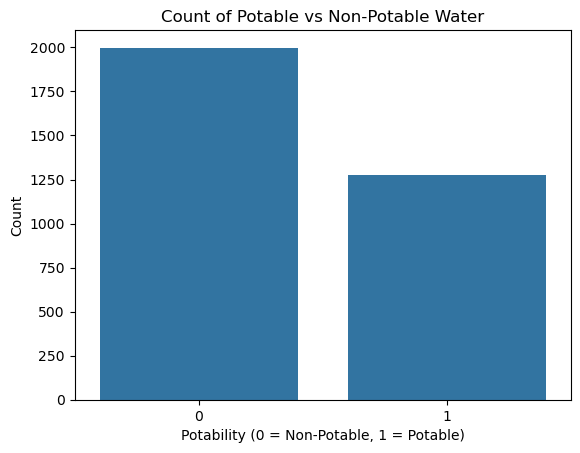

In [30]:
#count of potable vs non potable
sns.countplot(x='Potability', data=df)
plt.title('Count of Potable vs Non-Potable Water')
plt.xlabel('Potability (0 = Non-Potable, 1 = Potable)')
plt.ylabel('Count')
plt.show()


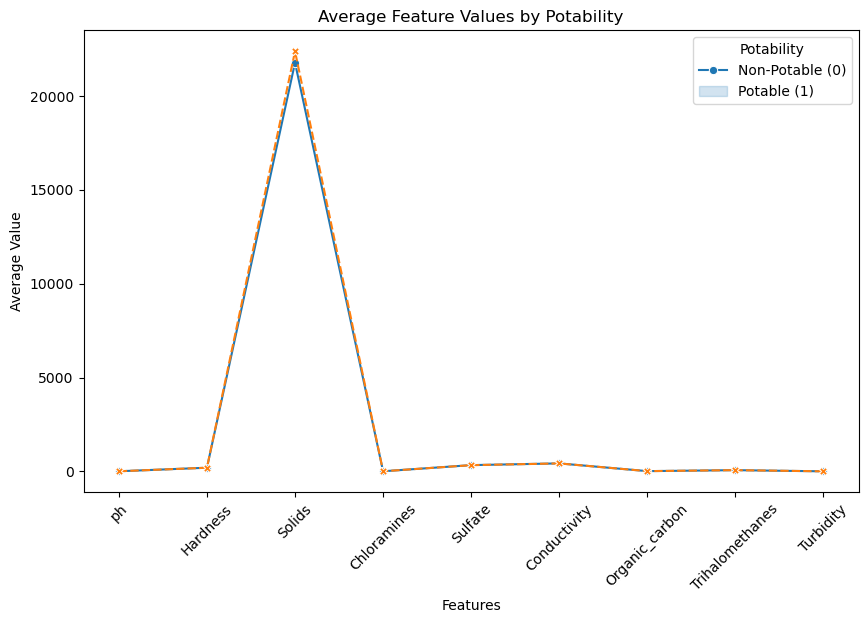

In [28]:

# Calculate average values of each feature grouped by Potability
mean_values = df.groupby('Potability').mean().T  # Transpose so features are rows

# Create lineplot
plt.figure(figsize=(10,6))
sns.lineplot(data=mean_values, markers=True)
plt.title('Average Feature Values by Potability')
plt.xlabel('Features')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.legend(title='Potability', labels=['Non-Potable (0)', 'Potable (1)'])
plt.show()


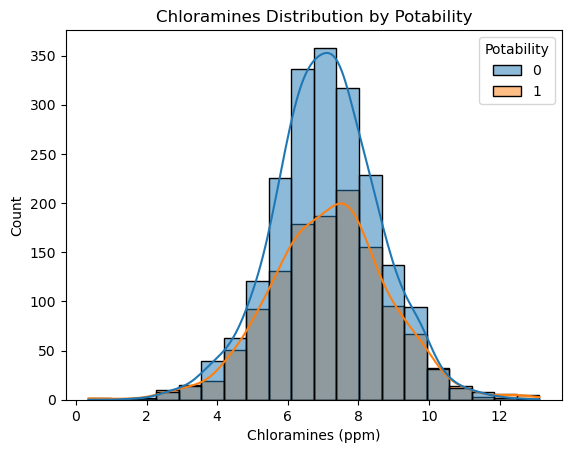

In [24]:
sns.histplot(data=df, x='Chloramines', hue='Potability', bins=20, kde=True)
plt.title('Chloramines Distribution by Potability')
plt.xlabel('Chloramines (ppm)')
plt.ylabel('Count')
plt.show()


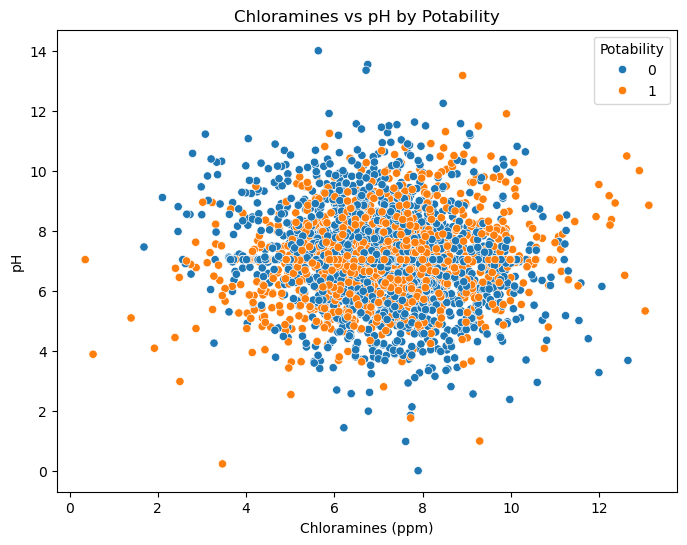

In [27]:
#chloramines vs ph by potability
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Chloramines', y='ph', hue='Potability')
plt.title('Chloramines vs pH by Potability')
plt.xlabel('Chloramines (ppm)')
plt.ylabel('pH')
plt.show()


## Insights & Summary

**1. Target Analysis**
- 61% of water samples are non-potable and 39% are potable.
- Slightly  imbalance observed.

**2. Feature Analysis**
- Potable water has slightly higher Chloramines and pH closer to neutral.
- Most other features show very small differences between classes.

**3. Correlation Insights**
- Chloramines have a weak positive correlation with Potability.
- Other features show very weak correlation, indicating that multiple factors influence water safety.

**4. Visual Insights**
- countplot shows the potable and non potable water counts
- Lineplot shows trends of average feature values for Potable vs Non-Potable water
- Histplot shows the chloromine ditributed by potability
- scatterplot shows the chloromines vs ph by potability 

**5. Conclusion**
- Water safety depends on a combination of features rather than a single parameter.
- Chloramines and pH are slightly more indicative of potability.
- Dataset insights can guide future predictive modeling for classifying potable water.
